# Sequence Models & How to use them

**학습목표**
1. RNN, LSTM, GRU의 구조를 이해한다.
2. 위 모델을 사용하기 위한 데이터 구조를 이해한다.
3. 위 모든 내용을 코딩할 수 있다.

-----------------
* Thanks to : 한기영 대표님 @ Data Insight

## 1.환경 및 데이터 준비

### Import Packages

In [3]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error

### Data Loading

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/temperature.csv')
data.head(10)

,year,week,AvgTemp
0,2010,1,-3.000000
1,2010,2,-7.500000
2,2010,3,-7.900000
3,2010,4,-2.357143
4,2010,5,-3.342857
5,2010,6,-1.800000
6,2010,7,-0.314286
7,2010,8,-2.142857
8,2010,9,4.400000
9,2010,10,7.057143


In [5]:
data.tail()

,year,week,AvgTemp
260,2014,49,8.100000
261,2014,50,-4.357143
262,2014,51,-2.142857
263,2014,52,-5.542857
264,2014,53,-0.728571


## 2.데이터 이해

### 탐색하기

온도의 흐름(trend)을 살펴봅시다.

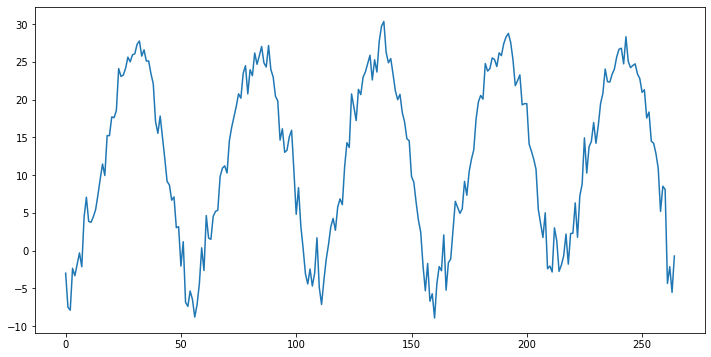

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.AvgTemp)
plt.show()

##3.데이터 준비

### 불필요한 데이터 정리 

In [6]:
data = data.drop(['year','week'], axis=1)
data.head()

,AvgTemp
0,-3.000000
1,-7.500000
2,-7.900000
3,-2.357143
4,-3.342857


## 4.Sequence 데이터 구조로 만들기

내일의 기온을 예측 하려면?

In [7]:
data = data.values

In [8]:
# 여기에 의미있는 기간(timestep을 지정해 봅시다.)
timestep= 21 # 한 번에 21주씩 고려하자.

# x의 데이터 구조를 3차원으로 만들어줘야 합니다.
x = np.array([data[i : i + timestep] for i in range( len(data) - timestep ) ])
y = np.array([data[i + timestep, -1] for i in range( len(data) - timestep ) ])

x_train, x_val, x_test = x[:160], x[160:200], x[200:]
y_train, y_val, y_test = y[:160], y[160:200], y[200:]

print(x.shape, y.shape)
print('-------------------------------')
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)
print('-------------------------------')
print('[ # , timestep, feature수 ] <-- 데이터의 구조 : ')

(244, 21, 1) (244,)
-------------------------------
(160, 21, 1) (160,)
(40, 21, 1) (40,)
(44, 21, 1) (44,)
-------------------------------
[ # , timestep, feature수 ] <-- 데이터의 구조 : 


In [ ]:
time_step = 21

x = []
y = []

for i in range(len(data)-time_step):
  x_emp = data[i:i+time_step,:]
  y_emp = data[i+time_step, -1]

  x.append(x_emp)
  y.append(y_emp)


x = np.array(x)
y = np.array(y)

x_train, x_val, x_test = x[:160], x[160:200], x[200:]
y_train, y_val, y_test = y[:160], y[160:200], y[200:]

print(x.shape, y.shape)
print('-------------------------------')
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)
print('-------------------------------')
print('[ # , timestep, feature수 ] <-- 데이터의 구조 : ')

(244, 21, 1) (244,)
-------------------------------
(160, 21, 1) (160,)
(40, 21, 1) (40,)
(44, 21, 1) (44,)
-------------------------------
[ # , timestep, feature수 ] <-- 데이터의 구조 : 


데이터의 구조 : [n, timestep, feature수]

## 5.RNN 모델링

In [ ]:
x_train.shape, y_train.shape


((160, 21, 1), (160,))

### [실습]무작정 RNN 모델링 수행해보기

In [ ]:
# 1.세션클리어
keras.backend.clear_session()

# 2.Sequential 모델 선언하기
model = keras.models.Sequential()

# 3. 레이어 쌓기 SimpleRNN의 default activation은 'tanh' 입니다.
# input_shape = [timestep, feature수]
# simplernn의 히든스테이트 노드는 16개로 작성해 봅시다.
model.add(tf.keras.layers.Input(shape=(21,1)))
model.add(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences=False))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile
model.compile(loss='mae', # mse 대비, 급격한 학습을 막는데 종종 사용이 됨
              optimizer='adam')

# 학습
history = model.fit( x_train , y_train  , epochs = 30 , validation_data=(x_val, y_val))

Epoch 1/30
5/5 [==============================] - 1s 62ms/step - loss: 12.9827 - val_loss: 13.7571
Epoch 2/30
5/5 [==============================] - 0s 11ms/step - loss: 12.8755 - val_loss: 13.6812
Epoch 3/30
5/5 [==============================] - 0s 13ms/step - loss: 12.7629 - val_loss: 13.6029
Epoch 4/30
5/5 [==============================] - 0s 12ms/step - loss: 12.6434 - val_loss: 13.5203
Epoch 5/30
5/5 [==============================] - 0s 11ms/step - loss: 12.5166 - val_loss: 13.4338
Epoch 6/30
5/5 [==============================] - 0s 15ms/step - loss: 12.3811 - val_loss: 13.3421
Epoch 7/30
5/5 [==============================] - 0s 12ms/step - loss: 12.2298 - val_loss: 13.2291
Epoch 8/30
5/5 [==============================] - 0s 12ms/step - loss: 12.0613 - val_loss: 13.0775
Epoch 9/30
5/5 [==============================] - 0s 12ms/step - loss: 11.8664 - val_loss: 12.8802
Epoch 10/30
5/5 [==============================] - 0s 14ms/step - loss: 11.6605 - val_loss: 12.7076
Epoch 11/

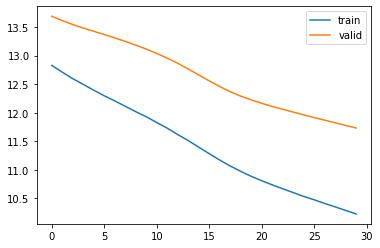

In [ ]:
# 학습 곡선을 그려봅시다.
plt.plot(history.history["loss"], label = 'train')
plt.plot(history.history["val_loss"], label = 'valid')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# Q1. 테스트 셋에서의 RMSE를 출력하여라.
y_pred = model.predict(x_test)
MSE(y_test, y_pred)

2/2 [==============================] - 0s 8ms/step


205.14421912762054

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True)

### More Exercises

1. 적절한 인풋 레이어를 구성할 것
2. 첫번째 히든레이어 : SimpleRNN
    * 히든스테이트 노드 16개, return_sequences=True
3. 두번째 히든레이어 : SimpleRNN
    * 히든스테이트 노드 32개, return_sequences=True
4. 플래튼
5. 회귀를 위한 적절한 아웃풋 레이어

In [ ]:
x_train.shape, y_train.shape

((160, 21, 1), (160,))

In [ ]:
####################
## Your Code Here ##
####################
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(21, 1)))

model.add(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(32, activation='tanh', return_sequences=True))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mse',
              optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 21, 16)            288       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 21, 32)            1568      
                                                                 
 flatten (Flatten)           (None, 672)               0         
                                                                 
 dense (Dense)               (None, 1)                 673       
                                                                 
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## 학습도 시킬 것
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
5/5 [==============================] - 0s 40ms/step - loss: 6.2600 - val_loss: 9.9847
Epoch 2/30
5/5 [==============================] - 0s 28ms/step - loss: 5.6561 - val_loss: 7.4940
Epoch 3/30
5/5 [==============================] - 0s 28ms/step - loss: 5.1169 - val_loss: 7.3858
Epoch 4/30
5/5 [==============================] - 0s 28ms/step - loss: 4.7809 - val_loss: 7.5313
Epoch 5/30
5/5 [==============================] - 0s 26ms/step - loss: 4.5863 - val_loss: 7.1435
Epoch 6/30
5/5 [==============================] - 0s 27ms/step - loss: 4.5487 - val_loss: 6.8039
Epoch 7/30
5/5 [==============================] - 0s 29ms/step - loss: 4.4993 - val_loss: 6.5916
Epoch 8/30
5/5 [==============================] - 0s 26ms/step - loss: 4.6816 - val_loss: 7.1909
Epoch 9/30
5/5 [==============================] - 0s 27ms/step - loss: 4.4726 - val_loss: 6.8835
Epoch 10/30
5/5 [==============================] - 0s 28ms/step - loss: 4.2950 - val_loss: 6.5852
Epoch 11/30
5/5 [============

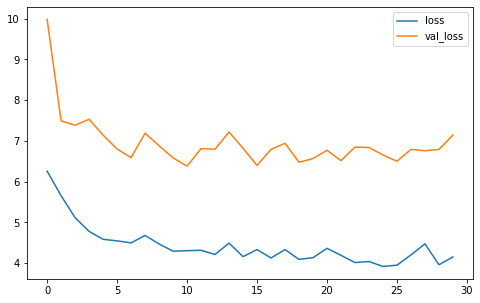

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
# Q1. 테스트 셋에서의 RMSE를 출력하여라.
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [ ]:
print(MSE(y_test, y_pred))

9.790713980230338


## 6.LSTM 모델링

1. 적절한 인풋 레이어를 구성할 것
2. 첫번째 히든레이어 : LSTM
    * 히든스테이트 노드 16개, return_sequences=True
3. 두번째 히든레이어 : LSTM
    * 히든스테이트 노드 32개, return_sequences=True
4. 플래튼
5. 회귀를 위한 적절한 아웃풋 레이어


In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Flatten, GRU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
x_train.shape, y_train.shape

((160, 21, 1), (160,))

In [23]:
####################
## Your Code Here ##
####################
tf.keras.backend.clear_session()

il = Input(shape=(21, 1))
hl = LSTM(16, activation='tanh',return_sequences=True)(il)
hl = LSTM(32, activation='tanh', return_sequences=True)(hl)
hl = Flatten()(hl)
ol = Dense(1, activation='linear')(hl)

model = Model(il, ol)

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 21, 16)            1152      
                                                                 
 lstm_1 (LSTM)               (None, 21, 32)            6272      
                                                                 
 flatten (Flatten)           (None, 672)               0         
                                                                 
 dense (Dense)               (None, 1)                 673       
                                                                 
Total params: 8,097
Trainable params: 8,097
Non-trainable params: 0
_________________________________________________________________


In [24]:
es = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

In [25]:
## 학습도 시킬 것
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1000, callbacks=[es])

Epoch 1/1000
5/5 [==============================] - 4s 238ms/step - loss: 261.6757 - val_loss: 299.3472
Epoch 2/1000
5/5 [==============================] - 0s 25ms/step - loss: 248.3763 - val_loss: 282.1284
Epoch 3/1000
5/5 [==============================] - 0s 23ms/step - loss: 234.3450 - val_loss: 260.7779
Epoch 4/1000
5/5 [==============================] - 0s 24ms/step - loss: 217.4562 - val_loss: 232.7000
Epoch 5/1000
5/5 [==============================] - 0s 24ms/step - loss: 193.6427 - val_loss: 199.7001
Epoch 6/1000
5/5 [==============================] - 0s 25ms/step - loss: 168.6573 - val_loss: 168.2697
Epoch 7/1000
5/5 [==============================] - 0s 24ms/step - loss: 148.5594 - val_loss: 147.8199
Epoch 8/1000
5/5 [==============================] - 0s 24ms/step - loss: 139.1532 - val_loss: 139.8091
Epoch 9/1000
5/5 [==============================] - 0s 36ms/step - loss: 133.3322 - val_loss: 134.7278
Epoch 10/1000
5/5 [==============================] - 0s 35ms/step - loss

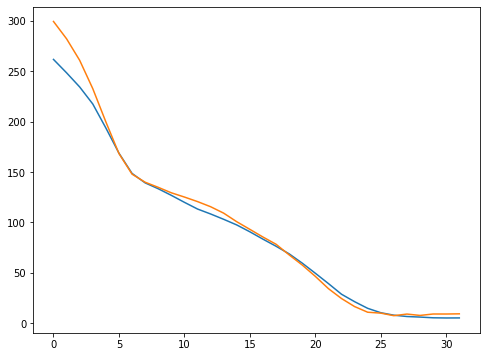

In [26]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [27]:
# Q1. 테스트 셋에서의 RMSE를 출력하여라.
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)**0.5

2/2 [==============================] - 1s 9ms/step


3.478779751721378

## 7.GRU 모델링


1. 적절한 인풋 레이어를 구성할 것
2. 첫번째 히든레이어 : GRU
    * 히든스테이트 노드 24개, return_sequences=True
3. 두번째 히든레이어 : GRU
    * 히든스테이트 노드 32개
4. 회귀를 위한 적절한 아웃풋 레이어

In [ ]:
####################
## Your Code Here ##
####################



In [ ]:
## 학습도 시킬 것



In [ ]:
# Q1. 테스트 셋에서의 RMSE를 출력하여라.

